# Day - 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder

###  Step:- 1.Load and preprocess the dataset

In [2]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Step:- 2.Split data into train-test sets

In [4]:
X = df.drop(['furnishingstatus'], axis=1)
X = pd.get_dummies(X,drop_first=True)

y = df['furnishingstatus']
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Step:- 3.Fit Linear Regression model

In [6]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)

### Step:-  4. Evaluate model

In [8]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error (MAE):",mae)
print("Mean Squared Error (MSE):",mse)
print("R² Score:" ,r2)

Mean Absolute Error (MAE): 0.6528965180210892
Mean Squared Error (MSE): 0.6121348260126974
R² Score: 0.02848331981607577


### Step:-  5. Plots the regression line and interprets coefficients.

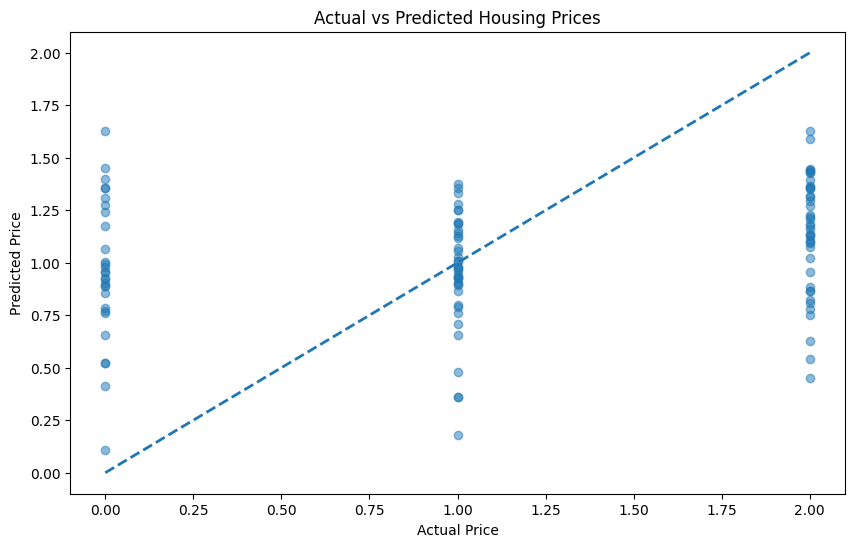

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()],'--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Housing Prices')
plt.show()

In [10]:
# Interpret coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("\nModel Coefficients:")
print(coefficients)

intercept = model.intercept_
print("\nIntercept:",intercept)


Model Coefficients:
                Feature   Coefficient
0                 price -1.081252e-07
1                  area  1.685381e-05
2              bedrooms  8.917839e-03
3             bathrooms  6.191835e-02
4               stories -5.216099e-02
5               parking -7.631987e-02
6          mainroad_yes -1.733173e-01
7         guestroom_yes -2.337399e-02
8          basement_yes -1.518542e-01
9   hotwaterheating_yes -3.887823e-02
10  airconditioning_yes -2.126464e-02
11         prefarea_yes  3.612406e-02

Intercept: 1.7294103226990085
